<a href="https://colab.research.google.com/github/abrazzaq02/Digital-Image-Processing/blob/main/DIP_LAB06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

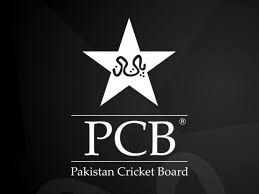

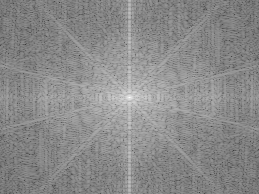

In [ ]:
import cv2, numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('img.jpg', 0)
f = np.fft.fft2(img)
f = np.fft.fftshift(f)
spectrum = np.log(np.abs(f) + 1)
spectrum_display = np.uint8(spectrum / spectrum.max() * 255)

cv2_imshow(img)
cv2_imshow(spectrum_display)


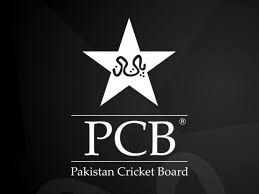

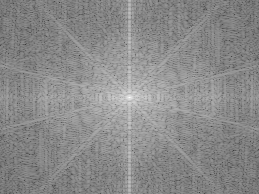

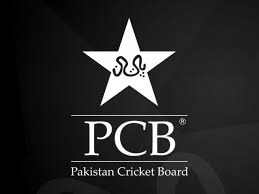

AttributeError: module 'cv2' has no attribute 'waitkey'

In [ ]:
import cv2, numpy as np
from google.colab.patches import cv2_imshow

img =cv2.imread('img.jpg',0)
f=np.fft.fftshift(np.fft.fft2(img))
spectrum =np.log(np.abs(f)+1)
reconstructed =np.fft.ifft2(np.fft.ifftshift(f))
reconstructed =np.abs(reconstructed)

cv2_imshow(img)
cv2_imshow(np.uint8(spectrum/spectrum.max()*255))
cv2_imshow(np.uint8(reconstructed))
cv2.waitkey(0)
cvv2.destroyallWindow()

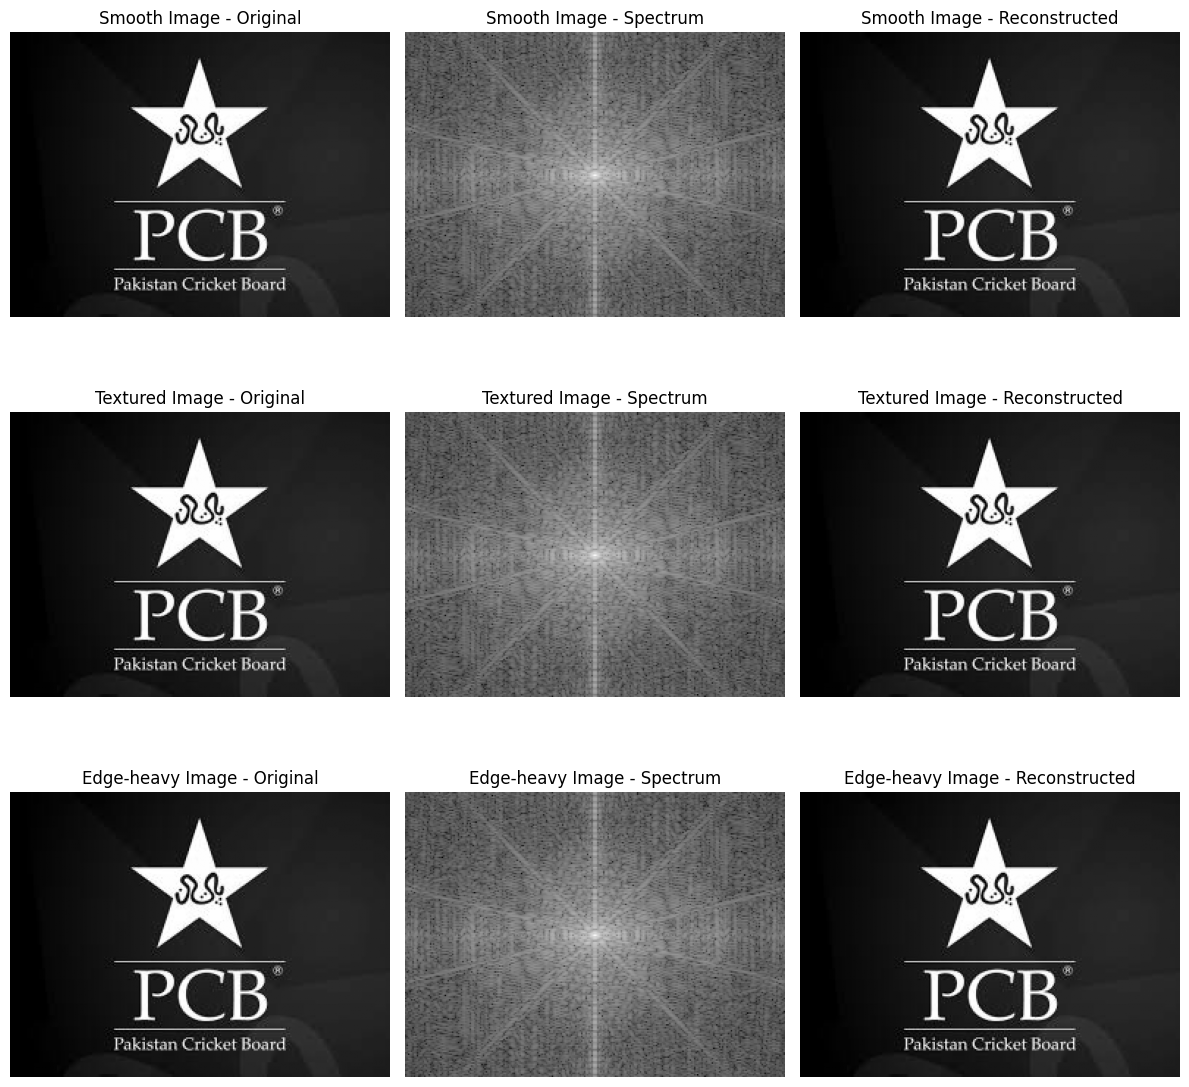

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_analysis(img):
    f = np.fft.fftshift(np.fft.fft2(img))
    spectrum = np.log(np.abs(f) + 1)
    reconstructed = np.fft.ifft2(np.fft.ifftshift(f))
    reconstructed = np.abs(reconstructed)
    return spectrum, reconstructed
smooth_img   = cv2.imread("img.jpg", 0)
textured_img = cv2.imread("img.jpg", 0)
edge_img     = cv2.imread("img.jpg", 0)

images = [
    (smooth_img, "Smooth Image"),
    (textured_img, "Textured Image"),
    (edge_img, "Edge-heavy Image")
]
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, (img, title) in enumerate(images):
    spectrum, reconstructed = fourier_analysis(img)

    axs[i, 0].imshow(img, cmap="gray")
    axs[i, 0].set_title(f"{title} - Original")
    axs[i, 0].axis("off")

    axs[i, 1].imshow(spectrum / spectrum.max(), cmap="gray")
    axs[i, 1].set_title(f"{title} - Spectrum")
    axs[i, 1].axis("off")

    axs[i, 2].imshow(reconstructed, cmap="gray")
    axs[i, 2].set_title(f"{title} - Reconstructed")
    axs[i, 2].axis("off")

plt.tight_layout()
plt.show()


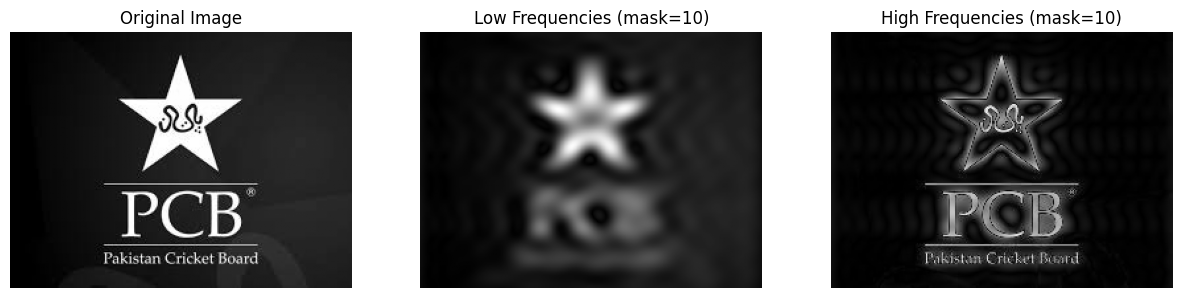

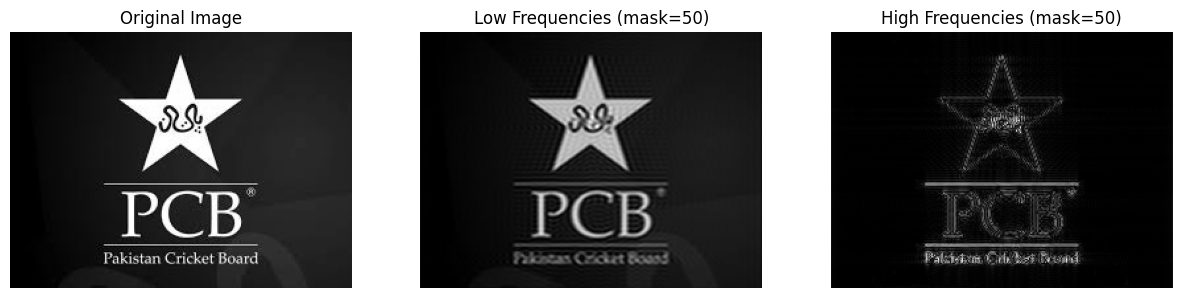

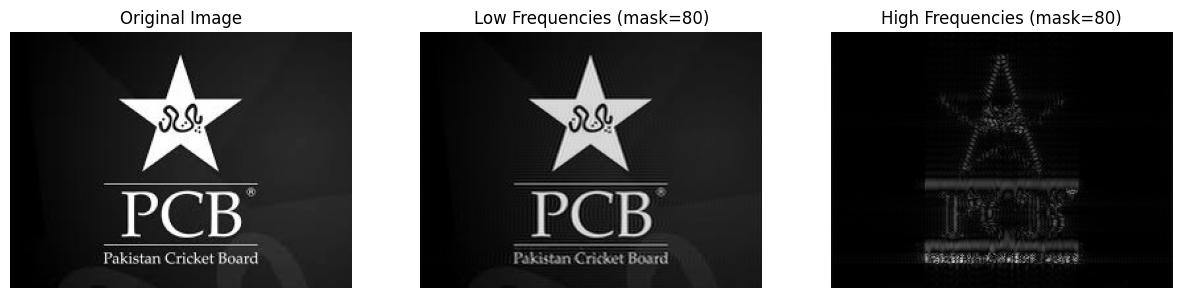

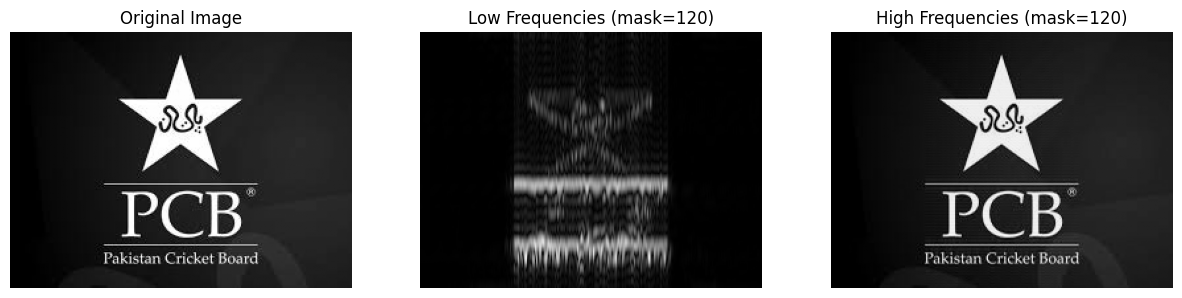

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img.jpg", 0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

def frequency_filter(fshift, mask_size):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1

    f_low = fshift * mask
    img_low = np.abs(np.fft.ifft2(np.fft.ifftshift(f_low)))

    f_high = fshift * (1 - mask)
    img_high = np.abs(np.fft.ifft2(np.fft.ifftshift(f_high)))
    return img_low, img_high
mask_sizes = [10, 50, 80, 120]
for m in mask_sizes:
    img_low, img_high = frequency_filter(fshift, m)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(img_low, cmap="gray")
    axs[1].set_title(f"Low Frequencies (mask={m})")
    axs[1].axis("off")

    axs[2].imshow(img_high, cmap="gray")
    axs[2].set_title(f"High Frequencies (mask={m})")
    axs[2].axis("off")

    plt.show()


Original Image:


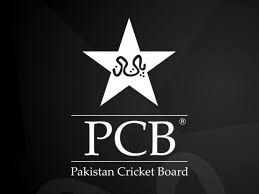

Low Frequencies Image:


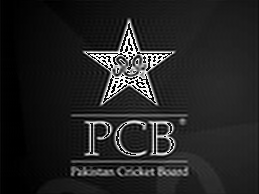

High Frequencies Image:


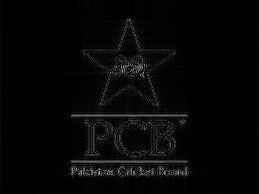



Original Image:


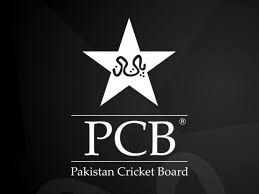

Low Frequencies Image:


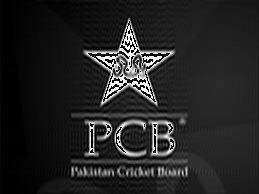

High Frequencies Image:


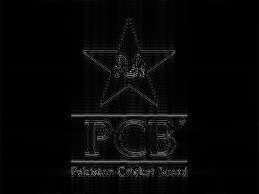



Original Image:


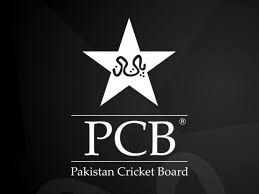

Low Frequencies Image:


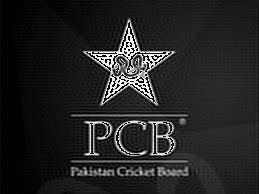

High Frequencies Image:


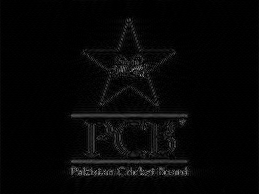

In [ ]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

img = cv2.imread("img.jpg", 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow, ccol = rows//2, cols//2

def frequency_filter(fshift, mask):
    low = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift * mask)))
    high = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift * (1 - mask))))
    return low, high

mask_square = np.zeros((rows, cols), np.uint8)
mask_size = 50
mask_square[crow-mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1

mask_rect = np.zeros((rows, cols), np.uint8)
mask_rect[crow-30:crow+30, ccol-80:ccol+80] = 1

Y, X = np.ogrid[:rows, :cols]
radius = 60
mask_circ = ((X-ccol)**2 + (Y-crow)**2) <= radius**2
mask_circ = mask_circ.astype(np.uint8)

masks = [(mask_square, "Square"), (mask_rect, "Rectangle"), (mask_circ, "Circle")]

for mask, name in masks:
    low, high = frequency_filter(fshift, mask)


    print("Original Image:")
    display(Image.fromarray(np.uint8(img)))

    print("Low Frequencies Image:")
    display(Image.fromarray(np.uint8(low)))

    print("High Frequencies Image:")
    display(Image.fromarray(np.uint8(high)))
    print("\n")
